In [118]:
#Program that uses artifical recurrent neural network, LSTM to predict stock closing prices 

In [119]:
#Libraries
import math
from datetime import datetime
import pandas_datareader as pdr
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [120]:
#Grab stock quote
start_date = datetime(2017, 1, 1)
end_date = datetime(2022, 1, 1)
sq = pdr.DataReader('TSLA', 'stooq', start_date, end_date)

# Reindex our dataframe to be in ascending order by date.
sq = sq.reindex(index=sq.index[::-1])
sq

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,14.3240,14.6887,14.0640,14.4660,82936545
2017-01-04,14.3167,15.2000,14.2873,15.1327,166881135
2017-01-05,15.0947,15.1653,14.7967,15.1167,87832155
2017-01-06,15.1287,15.3540,15.0300,15.2673,81965850
2017-01-09,15.2647,15.4613,15.2000,15.4187,58693575
...,...,...,...,...,...
2021-12-27,357.8900,372.3330,356.9050,364.6470,71145819
2021-12-28,369.8300,373.0000,359.4730,362.8230,60323907
2021-12-29,366.2130,368.0000,354.7130,362.0630,56154045


In [121]:
sq.shape

(1259, 5)

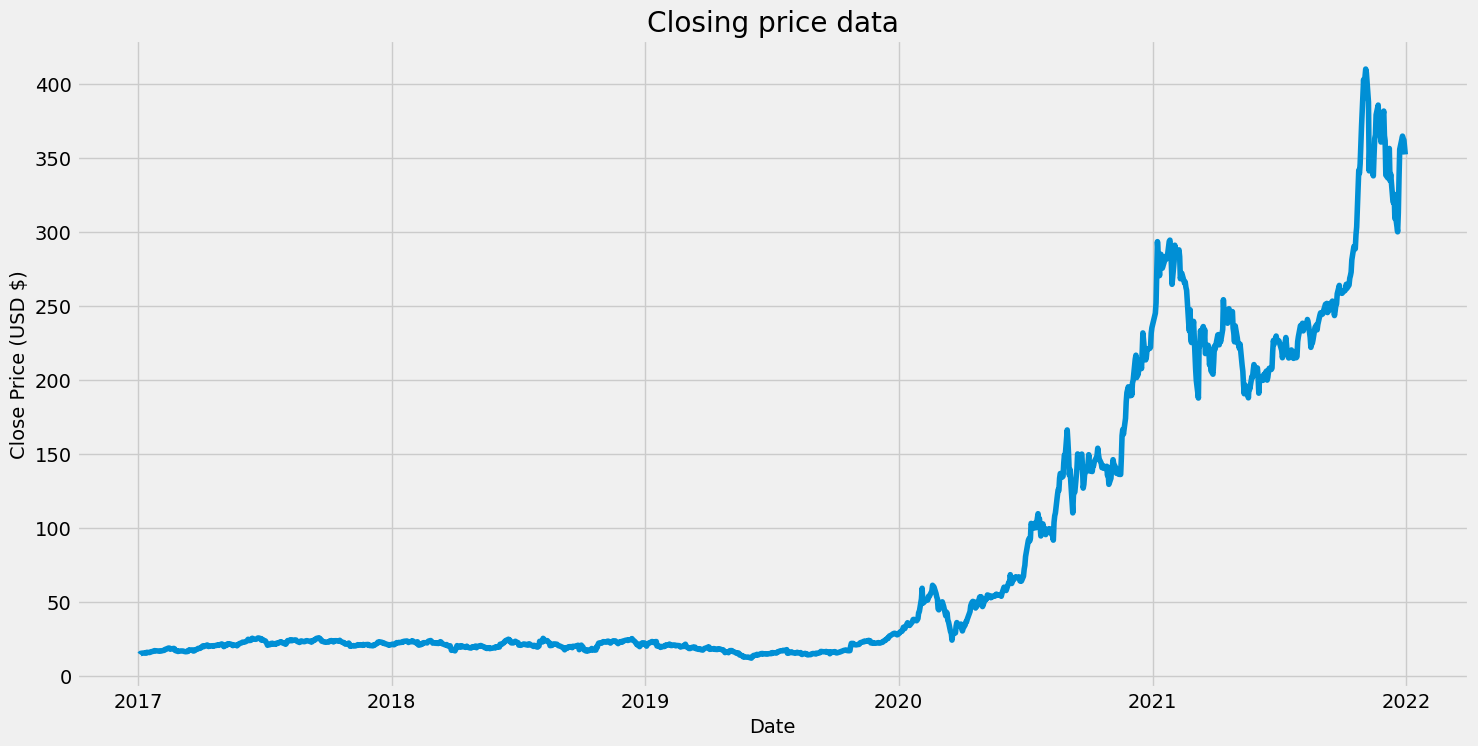

In [122]:
#Closing price data visual
plt.figure(figsize=(16,8))
plt.title('Closing price data')
plt.plot(sq['Close'])
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD $)', fontsize=14)
plt.show()

In [123]:
#Create dataframe for close column
data = sq.filter(['Close'])
#Convert dataframe to numpy array
dataset = data.values
#Get num rows to train model
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1008

In [124]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00636797],
       [0.00804294],
       [0.00800274],
       ...,
       [0.87964236],
       [0.86636978],
       [0.8550141 ]])

In [125]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split data into x_traina nd y_train sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i, 0])

  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.00636797, 0.00804294, 0.00800274, 0.00838109, 0.00876146,
       0.0085253 , 0.00850169, 0.00847832, 0.00984502, 0.00948149,
       0.00994727, 0.01085171, 0.011014  , 0.01171595, 0.01266887,
       0.0126455 , 0.01231714, 0.01239251, 0.01200059, 0.01221992,
       0.01176946, 0.0121546 , 0.01211942, 0.01319821, 0.01314948,
       0.01392   , 0.0151126 , 0.01511763, 0.01702196, 0.01708552,
       0.01688127, 0.01507065, 0.01562009, 0.01648433, 0.01583439,
       0.0129    , 0.01306908, 0.01126524, 0.01189507, 0.0119001 ,
       0.01197723, 0.01215962, 0.01209933, 0.01166068, 0.01136573,
       0.01104264, 0.0108399 , 0.01125519, 0.01323665, 0.01285654,
       0.01391498, 0.01382278, 0.01389312, 0.01201064, 0.01273595,
       0.01269726, 0.01410089, 0.01528344, 0.01649438, 0.01648257])]
[0.016573011619221943]

[array([0.00636797, 0.00804294, 0.00800274, 0.00838109, 0.00876146,
       0.0085253 , 0.00850169, 0.00847832, 0.00984502, 0.00948149,
       0.00994727, 0.01085171, 0.0

In [126]:
#Convert the x_train and y_train to numpy arrays

x_train, y_train = np.array(x_train), np.array(y_train)
x_train

array([[0.00636797, 0.00804294, 0.00800274, ..., 0.01528344, 0.01649438,
        0.01648257],
       [0.00804294, 0.00800274, 0.00838109, ..., 0.01649438, 0.01648257,
        0.01657301],
       [0.00800274, 0.00838109, 0.00876146, ..., 0.01648257, 0.01657301,
        0.01663657],
       ...,
       [0.32650519, 0.31670714, 0.32618863, ..., 0.52421712, 0.525825  ,
        0.52775195],
       [0.31670714, 0.32618863, 0.32670617, ..., 0.525825  , 0.52775195,
        0.55186016],
       [0.32618863, 0.32670617, 0.33347436, ..., 0.52775195, 0.55186016,
        0.56097987]])

In [127]:
#Reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(948, 60, 1)

In [128]:
#Building Model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [129]:
#Compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

In [130]:
#Train model
model.fit(x_train, y_train, batch_size=1, epochs=3)

Epoch 1/3
948/948 [==============================] - 13s 12ms/step - loss: 8.2477e-04
Epoch 2/3
948/948 [==============================] - 11s 12ms/step - loss: 4.5048e-04
Epoch 3/3
948/948 [==============================] - 11s 12ms/step - loss: 3.6726e-04


In [131]:
#Create the testing data set
test_data = scaled_data[training_data_len -60:, :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [132]:
#Convert to numpy/reshape
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [133]:
#Get models predicted price vals
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

8/8 [==============================] - 1s 8ms/step


In [134]:
#Get RSME
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

# Note this isn't tradtional rmse for regression where we would see values in range 0-2, 
# in this case RMSE close to 0 is desired and our result of ~3 is actually not terrible
# because this value isn't scaled and stock prices are roughly ~125

16.23825739546341

C:\Users\layf1\AppData\Local\Temp\ipykernel_24916\4205966873.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


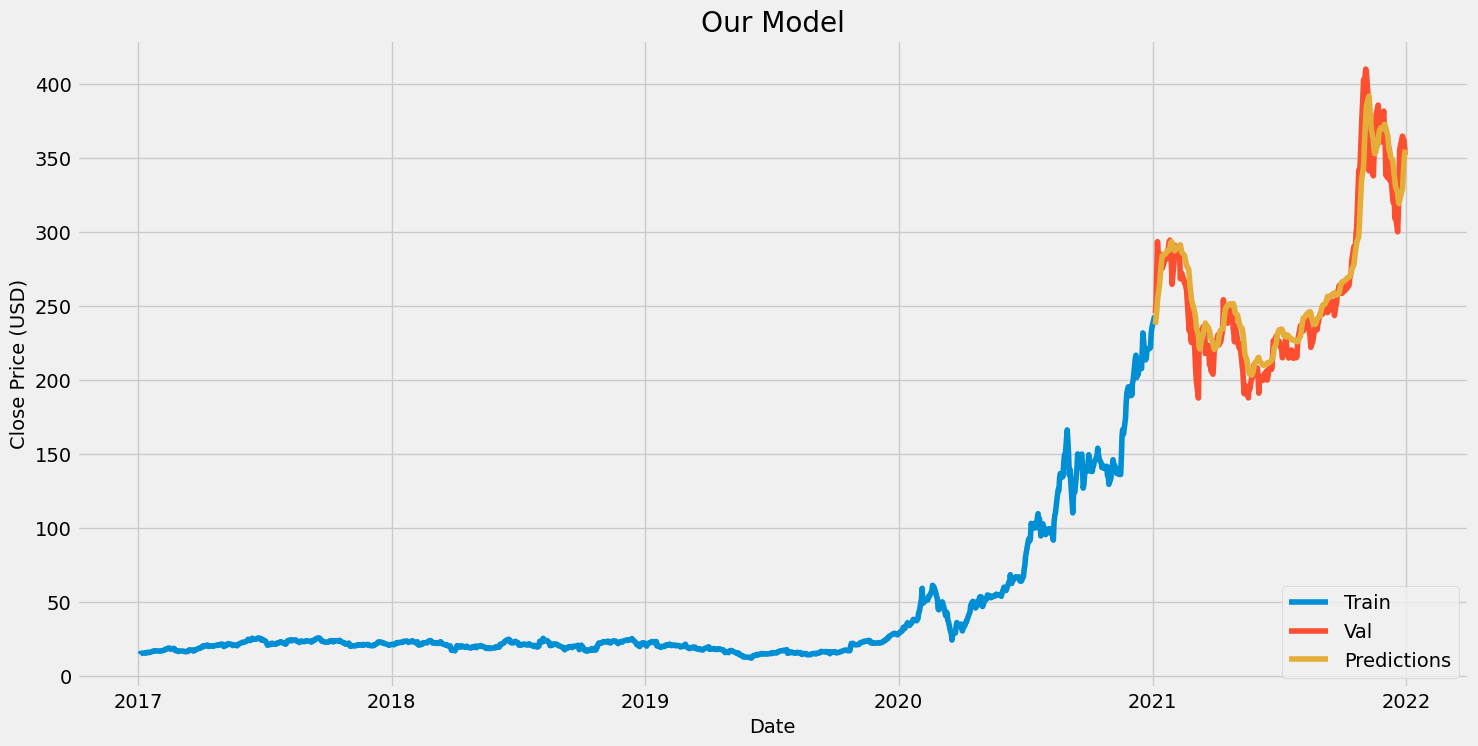

In [135]:
#Plotting
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Data visual
plt.figure(figsize=(16,8))
plt.title('Our Model')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price (USD)', fontsize=14)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()


In [136]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-01-05,245.037,237.296844
2021-01-06,251.993,241.596954
2021-01-07,272.013,246.325272
2021-01-08,293.340,253.611206
2021-01-11,270.397,264.068939
...,...,...
2021-12-27,364.647,328.836517
2021-12-28,362.823,337.903168
2021-12-29,362.063,345.908997


In [137]:
#Quote/DF
apple_quote = pdr.DataReader('AAPL', data_source='stooq', start='2012-01-01', end='2019-12-17')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
#Scale data (0-1)
last_60_days_scaled = scaler.transform(last_60_days)

#List of scaled data + reshape
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Undo scaling
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

1/1 [==============================] - 0s 18ms/step
[[8.659483]]


In [138]:
#Quote on specific day
apple_quote_day = pdr.DataReader('AAPL', data_source='stooq', start='2019-12-18', end='2019-12-18')
print(apple_quote_day['Close'])

Date
2019-12-18    68.516
Name: Close, dtype: float64
